# <font color=blue>Chapter 1: What is statistical modeling?</font>

In [1]:
suppressMessages(library(lattice))
suppressMessages(library(ggplot2))
suppressMessages(library(statisticalModeling))
suppressMessages(library(mosaicData))
suppressMessages(library(mosaic))
suppressMessages(library(lattice))
suppressMessages(library(rpart))
suppressMessages(library(rpart.plot))

#### Accessing data

In [2]:
# Use data() to load Trucking_jobs
data(Trucking_jobs, package = "statisticalModeling")

# View the number rows in Trucking_jobs
nrow(statisticalModeling::Trucking_jobs)

# Use names() to find variable names in mosaicData::Riders
names(mosaicData::Riders)

# Load ggplot2 package
library(ggplot2)

# Look at the head() of diamonds
head(ggplot2::diamonds)

[1] 129

[1] "date"    "day"     "highT"   "lowT"    "hi"      "lo"      "precip" 
 [8] "clouds"  "riders"  "ct"      "weekday" "wday"

carat cut       color clarity depth table price x    y    z   
1 0.23  Ideal     E     SI2     61.5  55    326   3.95 3.98 2.43
2 0.21  Premium   E     SI1     59.8  61    326   3.89 3.84 2.31
3 0.23  Good      E     VS1     56.9  65    327   4.05 4.07 2.31
4 0.29  Premium   I     VS2     62.4  58    334   4.20 4.23 2.63
5 0.31  Good      J     SI2     63.3  58    335   4.34 4.35 2.75
6 0.24  Very Good J     VVS2    62.8  57    336   3.94 3.96 2.48

#### Starting with formulas

In [3]:
# Find the variable names in AARP
names(statisticalModeling::AARP)
data(AARP, package = "statisticalModeling")

# Find the mean cost broken down by sex
mosaic::mean(Cost ~ Sex, data = AARP)

[1] "Age"      "Sex"      "Coverage" "Cost"

F        M 
47.29778 57.53056

# <font color=blue>Chapter 2: Designing, training, and evaluating models</font>

#### Modeling running times

In [6]:
Runners <- read.csv("Runners100.csv")
head(Runners)

age net   gun    sex year previous nruns start_position orig.id
1 54  90.00  90.28 F   2004 5        9     eager           5035  
2 27  74.22  75.08 M   2001 1        8     eager             10  
3 24  90.85  93.55 F   2000 0        4     calm            9271  
4 39  91.70  95.18 F   2004 1        3     mellow           256  
5 52  94.13  99.40 M   2005 1        4     mellow          1175  
6 28  99.13 105.60 M   2003 1        5     mellow         17334

[1] "age"            "net"            "gun"            "sex"           
[5] "year"           "previous"       "nruns"          "start_position"
[9] "orig.id"

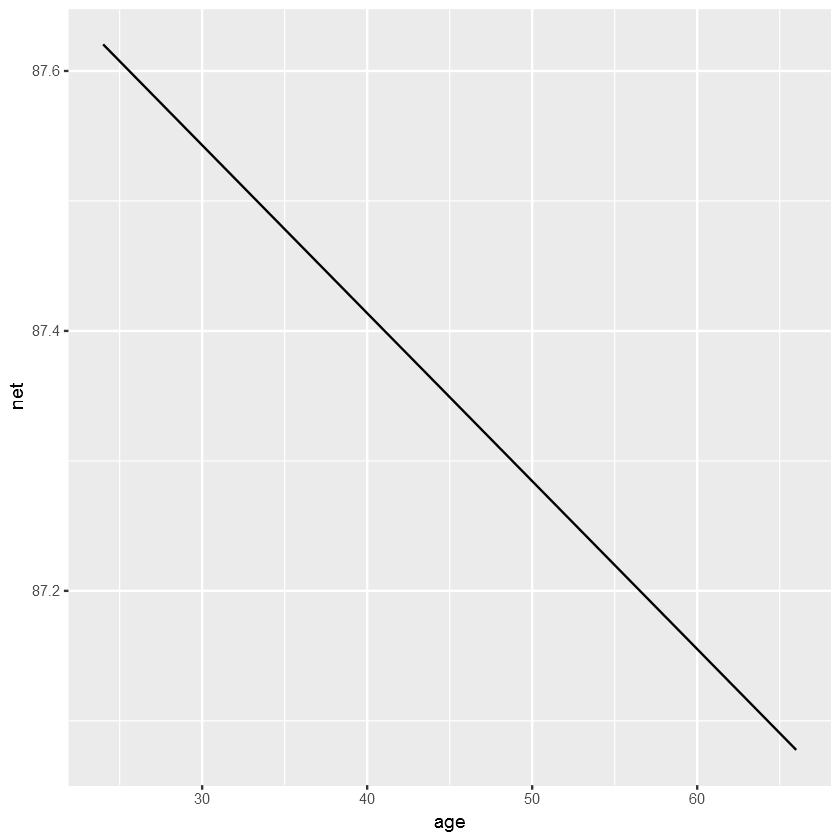

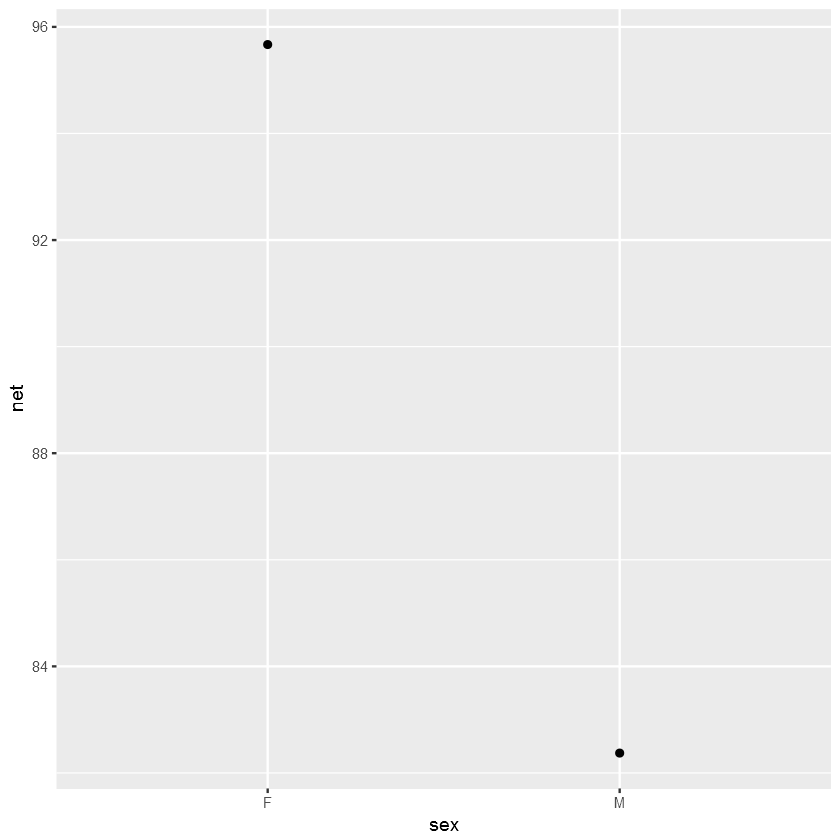

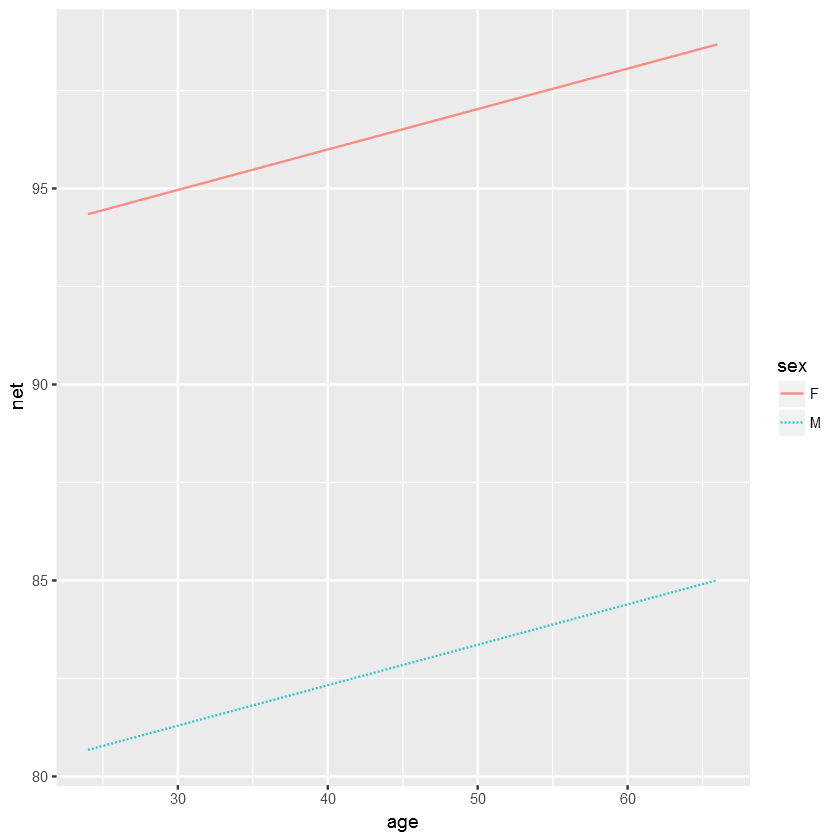

In [7]:
# Find the variable names in Runners 
names(Runners)

# Build models: handicap_model_1, handicap_model_2, handicap_model_3 
handicap_model_1 <- lm(net ~ age, data = Runners)
handicap_model_2 <- lm(net ~ sex, data = Runners)
handicap_model_3 <- lm(net ~ age + sex, data = Runners)

# For now, here's a way to visualize the models
statisticalModeling::fmodel(handicap_model_1)
statisticalModeling::fmodel(handicap_model_2)
statisticalModeling::fmodel(handicap_model_3)

#### Using the recursive partitioning model architecture

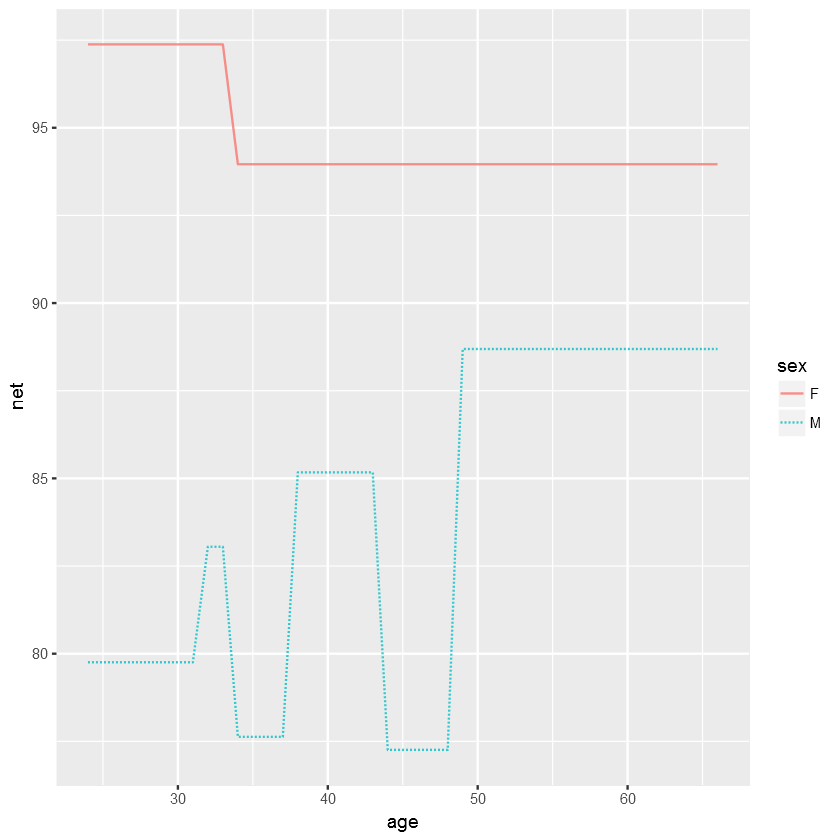

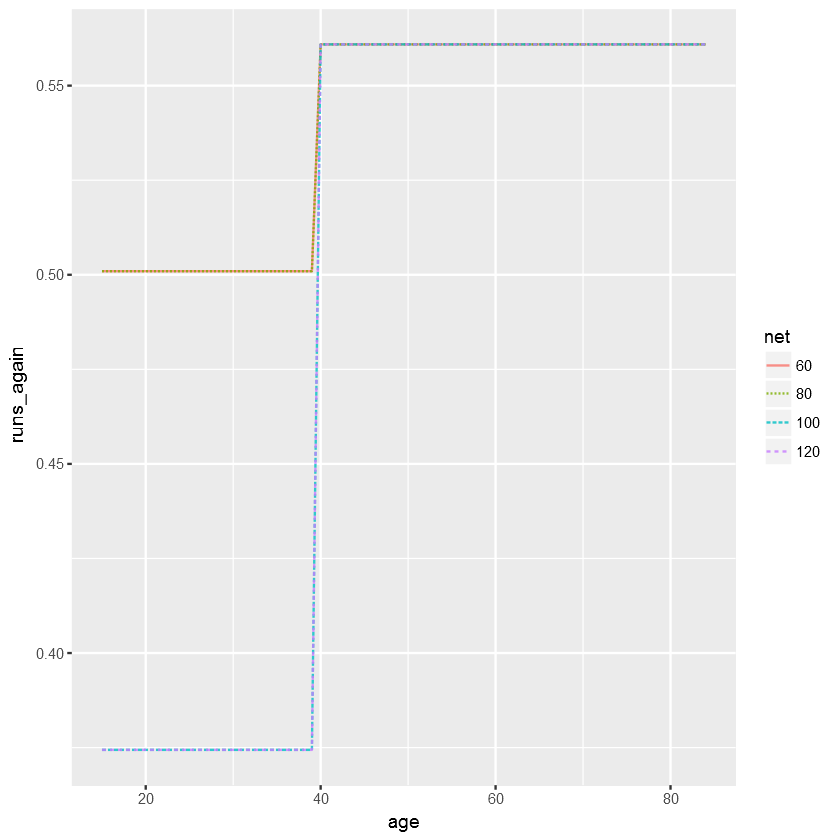

In [26]:
Runners <- read.csv("Runners100.csv")
Ran_twice <- read.csv("Ran_twice.csv")

# Build rpart model: model_2
model_2 <- rpart(net ~ age + sex, data = Runners, cp = 0.002)

# Examine graph of model_2 (don't change)
statisticalModeling::fmodel(model_2, ~ age + sex)

# Create run_again_model
run_again_model <- rpart(runs_again ~ age + sex + net, data = Ran_twice, cp = 0.005)

# Visualize the model (don't change)
statisticalModeling::fmodel(run_again_model, ~ age + net, data = Ran_twice)

#### From inputs to outputs

In [11]:
# Display the variable names in the AARP data frame
data(AARP, package = "statisticalModeling")
names(AARP)

# Build a model: insurance_cost_model
insurance_cost_model <- lm(Cost ~ Age + Sex + Coverage, data = AARP)

# Construct a data frame: example_vals 
example_vals <- data.frame(Age=60, Sex="F", Coverage=200)

# Predict insurance cost using predict()
predict(insurance_cost_model, example_vals)

# Load statisticalModeling
library(statisticalModeling)

# Calculate model output using evaluate_model()
evaluate_model(insurance_cost_model, example_vals)

[1] "Age"      "Sex"      "Coverage" "Cost"

1 
363.637

Age Sex Coverage model_output
1 60  F   200      363.637

#### Extrapolation

In [12]:
# Build a model: insurance_cost_model
insurance_cost_model <- lm(Cost ~ Age + Sex + Coverage, data = AARP)

# Create a data frame: new_inputs_1
new_inputs_1 <- data.frame(Age = c(30,90), Sex = c("F", "M"), 
                           Coverage = c(0,100))

# Use expand.grid(): new_inputs_2
# Create a Data Frame from All Combinations of Factor Variables
new_inputs_2 <- expand.grid(Age = c(30,90), Sex = c("F", "M"), 
                           Coverage = c(0,100))

# Use predict() for new_inputs_1 and new_inputs_2
predict(insurance_cost_model, newdata = new_inputs_1)
predict(insurance_cost_model, newdata = new_inputs_2)

# Use evaluate_model() for new_inputs_1 and new_inputs_2
evaluate_model(insurance_cost_model, data = new_inputs_1)
evaluate_model(insurance_cost_model, data = new_inputs_2)

1         2 
-99.98726 292.88435

1         2         3         4         5         6         7         8 
-99.98726 101.11503 -89.75448 111.34781  81.54928 282.65157  91.78206 292.88435

Age Sex Coverage model_output
1 30  F     0      -99.98726   
2 90  M   100      292.88435

Age Sex Coverage model_output
1 30  F     0      -99.98726   
2 90  F     0      101.11503   
3 30  M     0      -89.75448   
4 90  M     0      111.34781   
5 30  F   100       81.54928   
6 90  F   100      282.65157   
7 30  M   100       91.78206   
8 90  M   100      292.88435

#### Typical values of data

Age Sex Coverage model_output
1  40  F    0       -66.4702087 
2  60  F    0         0.5638866 
3  80  F    0        67.5979818 
4  40  M    0       -56.2374309 
5  60  M    0        10.7966643 
6  80  M    0        77.8307596 
7  40  F   50        24.2980606 
8  60  F   50        91.3321558 
9  80  F   50       158.3662510 
10 40  M   50        34.5308383 
11 60  M   50       101.5649336 
12 80  M   50       168.5990288

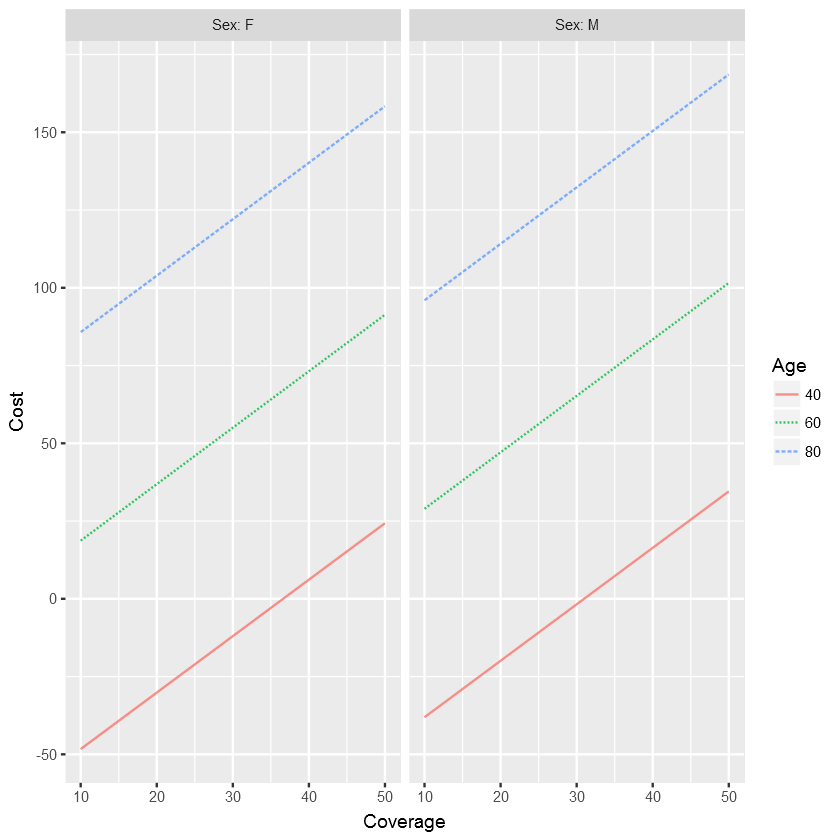

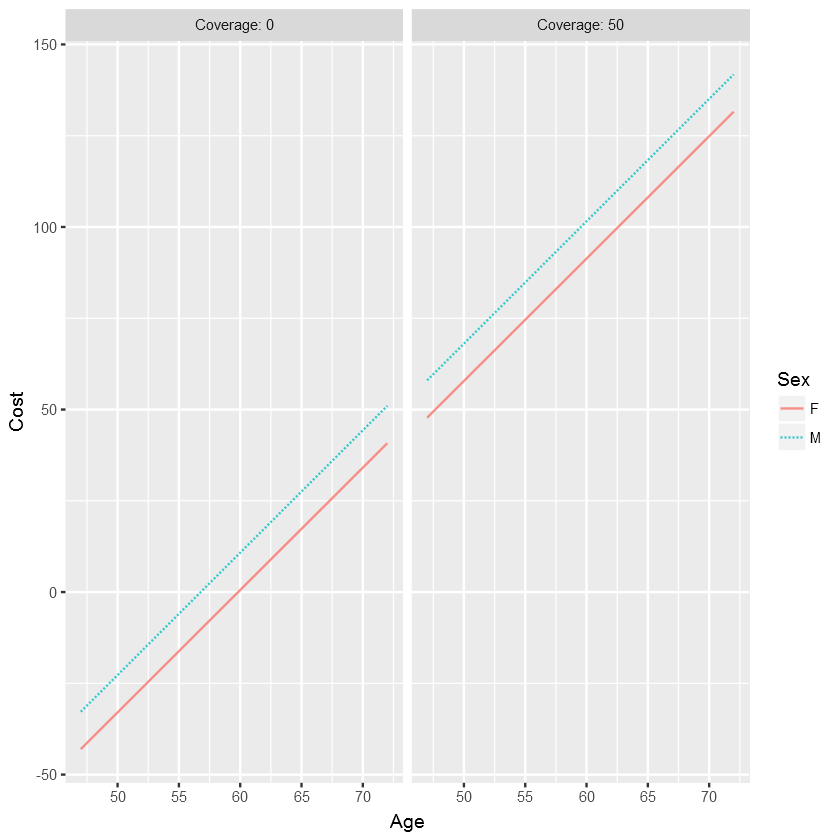

In [13]:
# Evaluate insurance_cost_model
evaluate_model(insurance_cost_model)

# Use fmodel() to reproduce the graphic
fmodel(insurance_cost_model, ~ Coverage + Age + Sex)

# A new formula to highlight difference in sexes
new_formula <- ~  Age + Sex + Coverage

# Make the new plot (don't change)
fmodel(insurance_cost_model, new_formula)

# <font color=blue>Chapter 3: Assessing prediction performance</font>

#### Running experience

In [14]:
Runners <- read.csv("Runners100.csv")
Runners_100 <- Runners[1:100,]

# Build a model of net running time
base_model <- lm(net ~ age + sex, data = Runners_100)

# Evaluate base_model on the training data
base_model_output <- predict(base_model, newdata = Runners_100)

# Build the augmented model
aug_model <- lm(net ~ age + sex + previous, data = Runners_100)

# Evaluate aug_model on the training data
aug_model_output <- predict(aug_model, newdata = Runners_100)

# How much do the model outputs differ?
mean((base_model_output - aug_model_output) ^ 2, na.rm = TRUE)

[1] 0.5157921

#### Prediction performance

In [15]:
# Build and evaluate the base model on Runners_100
base_model <- lm(net ~ age + sex, data = Runners_100)
base_model_output <- predict(base_model, newdata = Runners_100)

# Build and evaluate the augmented model on Runners_100
aug_model <- lm(net ~ age + sex + previous, data = Runners_100)
aug_model_output <- predict(aug_model, newdata = Runners_100)

# Find the case-by-case differences
base_model_differences <- with(Runners_100, net - base_model_output)
aug_model_differences <- with(Runners_100, net - aug_model_output)

# Calculate mean square errors
mean(base_model_differences ^ 2)
mean(aug_model_differences ^ 2)

[1] 131.5594

[1] 131.0436

#### Where's the statistics?

In [16]:
library(mosaicData)
data(CPS85)

# Add bogus column to CPS85 (don't change)
CPS85$bogus <- rnorm(nrow(CPS85)) > 0

# Make the base model
base_model <- lm(wage ~ educ + sector + sex, data = CPS85)

# Make the bogus augmented model
aug_model <- lm(wage ~ educ + sector + sex + bogus, data = CPS85)

# Find the MSE of the base model
mean((CPS85$wage - predict(base_model, newdata = CPS85)) ^ 2)

# Find the MSE of the augmented model
mean((CPS85$wage -  predict(aug_model, newdata = CPS85))^2)

[1] 19.73308

[1] 19.70521

#### Tidying up

In [17]:
suppressMessages(library(statisticalModeling))
Runners <- read.csv("Runners100.csv")

mod <- lm(net ~ age + sex, data = Runners)
out <- predict(mod, newdata = Runners)

out2 <- evaluate_model(mod, data = Runners)
with(data = out2, mean((net - model_output) ^ 2, na.rm = TRUE))

names(out2)

[1] 131.5594

[1] "age"            "net"            "gun"            "sex"           
 [5] "year"           "previous"       "nruns"          "start_position"
 [9] "orig.id"        "model_output"

#### Testing and training datasets

In [18]:
Runners <- read.csv("Runners100.csv")
Runners_100 <- Runners[1:100,]

# Generate a random TRUE or FALSE for each case in Runners_100
Runners_100$training_cases <- rnorm(nrow(Runners_100)) > 0

# Build base model net ~ age + sex with training cases
base_model <- lm(net ~ age + sex, data = subset(Runners_100, training_cases))

# Evaluate the model for the testing cases
Preds <- evaluate_model(base_model, data = subset(Runners_100, !training_cases))

# Calculate the MSE on the testing data
with(data = Preds, mean((net - model_output)^2))

[1] 143.4634

#### Repeating random trials

Since the result of cross validation varies from trial to trial, it's helpful to run many trials so that you can see how much variation there is. As you'll see, this will be a common process as you move through the course.

To simplify things, the cv_pred_error() function in the statisticalModeling package will carry out this repetitive process for you. All you need do is provide one or more models as input to cv_pred_error(); the function will do all the work of creating training and testing sets for each trial and calculating the mean square error for each trial.

In-Sample Fehler ist kleiner als der durchschnittliche Fehler bei der Cross-Validierung.

In [19]:
Runners <- read.csv("Runners100.csv")
Runners_100 <- Runners[1:100,]

# The model
model <- lm(net ~ age + sex, data = Runners_100)

# Find the in-sample error (using the training data)
in_sample <- evaluate_model(model, data = Runners_100)
in_sample_error <- 
  with(in_sample, mean((net - model_output)^2, na.rm = TRUE))

# Calculate MSE for many different trials
trials <- cv_pred_error(model)

# View the cross-validated prediction errors
trials

# Find confidence interval on trials and compare to training_error
mosaic::t.test(~ mse, mu = in_sample_error, data = trials)
in_sample_error

mse      model
1 144.0722 model
2 141.7224 model
3 138.7047 model
4 139.3440 model
5 141.2182 model

~mse



	One Sample t-test

data:  mse
t = 9.9592, df = 4, p-value = 0.000571
alternative hypothesis: true mean is not equal to 131.5594
95 percent confidence interval:
 138.3770 143.6476
sample estimates:
mean of x 
 141.0123 


[1] 131.5594

#### To add or not to add (an explanatory variable)?
Es werden die durchschnittlichen CV-Fehler fÃ¼r zwei Modelle miteinander vergleichen.

In [20]:
Runners <- read.csv("Runners100.csv")
Runners_100 <- Runners[1:100,]

# The base model
base_model <- lm(net ~ age + sex, data = Runners_100)

# An augmented model adding previous as an explanatory variable
aug_model <- lm(net ~ age + sex + previous, data = Runners_100)

# Run cross validation trials on the two models
trials <- cv_pred_error(base_model, aug_model)

# Compare the two sets of cross-validated errors
t.test(mse ~ model, data = trials)

mse ~ model



	Welch Two Sample t-test

data:  mse by model
t = 0.082946, df = 7.4893, p-value = 0.9361
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.857477  4.141798
sample estimates:
 mean in group aug_model mean in group base_model 
                141.3604                 141.2183 


# <font color=blue>Chapter 4: Exploring data with models</font>

#### The maximum error rate

In [21]:
Runners <- read.csv("Runners100.csv")
# Build the null model with rpart()
Runners$all_the_same <- 1 # null "explanatory" variable
null_model <- rpart(start_position ~ all_the_same, data = Runners)

# Evaluate the null model on training data
null_model_output <- evaluate_model(null_model, data = Runners, type = "class")

# Calculate the error rate
with(data = null_model_output, mean(model_output != start_position, na.rm = TRUE))

# Generate a random guess...
null_model_output$random_guess <- mosaic::shuffle(Runners$start_position)

# ...and find the error rate
with(data = null_model_output, mean(start_position != random_guess, na.rm = TRUE))

[1] 0.51

[1] 0.56

#### A non-null model

In [22]:
Runners <- read.csv("Runners100.csv")
# Train the model
model <- rpart(start_position ~ age + sex, data = Runners, cp = 0.001)

# Get model output with the training data as input
model_output <- evaluate_model(model, data = Runners, type = "class")

# Find the error rate
with(data = model_output, mean(model_output != start_position, na.rm = TRUE))

[1] 0.39

#### A better model?

In [23]:
Runners <- read.csv("Runners100.csv")
Runners$all_the_same <- 1

train <- rbinom(nrow(Runners), 1, 0.8)
test <- !train

Training_data <- Runners[which(train == 1),]
Testing_data <- Runners[which(test == 1),]


# Train the models 
null_model <- rpart(start_position ~ all_the_same,
                    data = Training_data, cp = 0.001)
model_1 <- rpart(start_position ~ age, 
                 data = Training_data, cp = 0.001)
model_2 <- rpart(start_position ~ age + sex, 
                 data = Training_data, cp = 0.001)

# Find the out-of-sample error rate
null_output <- evaluate_model(null_model, data = Testing_data, type = "class")
model_1_output <- evaluate_model(model_1, data = Testing_data, type = "class")
model_2_output <- evaluate_model(model_2, data = Testing_data, type = "class")

# Calculate the error rates
null_rate <- with(data = null_output, 
                  mean(model_output != start_position, na.rm = TRUE))
model_1_rate <- with(data = model_1_output, 
                  mean(model_output != start_position, na.rm = TRUE))
model_2_rate <- with(data = model_2_output, 
                  mean(model_output != start_position, na.rm = TRUE))

# Display the error rates
null_rate
model_1_rate
model_2_rate


[1] 0.5185185

[1] 0.4814815

[1] 0.4074074

#### Evaluating a recursive partitioning model

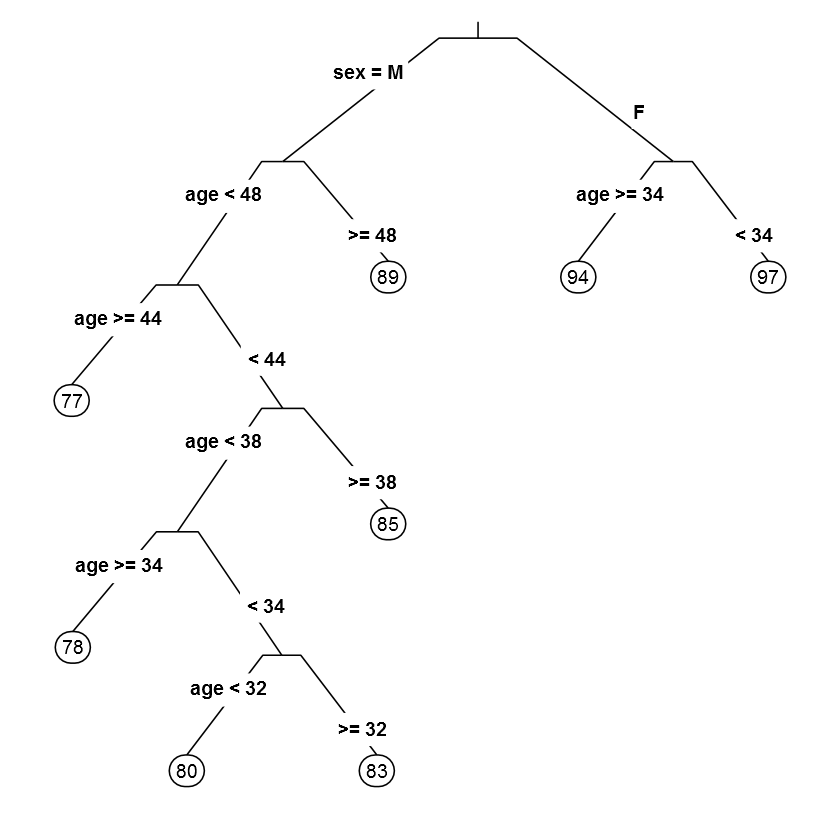

In [24]:
Runners <- read.csv("Runners100.csv")
model <- rpart(net ~ age + sex, data = Runners, cp = 0.001)

# The prp() function plots the model as a tree.
prp(model, type = 3)

#### Exploring birth-weight data

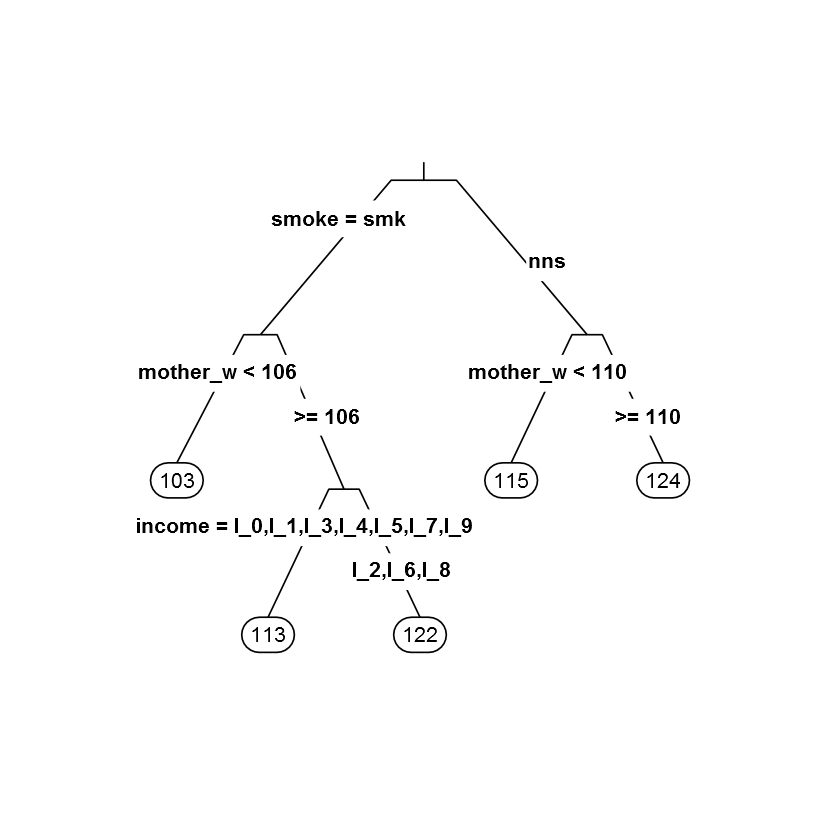

In [25]:
model <- rpart(baby_wt ~ smoke + income + mother_age + mother_wt, data = Birth_weight)
prp(model, type = 3)

# <font color=blue>Chapter 5: Covariates and effect size</font>

#### House prices

In [27]:
library(statisticalModeling)
data(Houses_for_sale)

# Train the model price ~ fireplaces
simple_model <- lm(price ~ fireplaces, data = Houses_for_sale)

# Evaluate simple_model
evaluate_model(simple_model)

# Calculate the difference in model price
naive_worth <- 238522.7 - 171823.9

# Train another model including living_area
sophisticated_model <-lm(price ~ fireplaces + living_area, data = Houses_for_sale)

# Evaluate that model
evaluate_model(sophisticated_model)

# Find price difference for fixed living_area
sophisticated_worth <-  242319.5 - 233357.1

fireplaces model_output
1 0          171823.9    
2 1          238522.7

fireplaces living_area model_output
1 0          1000        124043.6    
2 1          1000        133006.1    
3 0          2000        233357.1    
4 1          2000        242319.5    
5 0          3000        342670.6    
6 1          3000        351633.0

#### Crime and poverty

-  Using a linear architecture and the Crime data, train model_1 and model_2 with formulas R ~ X and R ~ W, respectively.
-  Find the output of each model using evaluate_model().
-  Copy and paste values from the evaluate_model() output to calculate for each model the change in crime rate from the first level of the explanatory variable to the second level (i.e. X = 100 to X = 200 and W = 400 to W = 600).
-  Using lm(), train model_3 with the formula R ~ X + W. In effect, X serves as a covariate for W and vice versa.
-  Evaluate model_3.
-  Again, copy and paste values from the evaluate_model() output to calculate the change in crime rate associated with a decrease of 100 (from 300 to 200) in X, holding W constant at 600. Call this change_with_X_holding_W_constant. Likewise, calculate the change in crime rate associated with a decrease of 200 (from 600 to 400) in W, holding X constant at 200. Call this change_with_W_holding_X_constant. Note that you get very different results with and without covariates.

In [31]:
library(statisticalModeling)
data(Houses_for_sale)

# Train model_1 and model_2
model_1 <- lm(R ~ X, data = Crime)
model_2 <- lm(R ~ W, data = Crime)

# Evaluate each model...
evaluate_model(model_1)
evaluate_model(model_2)

# ...and calculate the difference in output for each
change_with_X <-  106.82223 - 89.46721
change_with_W <-  68.32909 - 103.70777

# Train model_3 using both X and W as explanatory variables
model_3 <- lm(R ~ X + W, data = Crime)

# Evaluate model_3
evaluate_model(model_3)

# Find the difference in output for each of X and W
change_with_X_holding_W_constant <- 228.50366 - 134.86434
change_with_W_holding_X_constant <- 134.86434 - 31.03422

X   model_output
1 100 106.82223   
2 200  89.46721   
3 300  72.11219

W   model_output
1 400  68.32909   
2 600 103.70777   
3 800 139.08644

X   W   model_output
1 100 400 -62.60510   
2 200 400  31.03422   
3 300 400 124.67354   
4 100 600  41.22502   
5 200 600 134.86434   
6 300 600 228.50366   
7 100 800 145.05515   
8 200 800 238.69447   
9 300 800 332.33379

#### Equal pay?

In [32]:
library(statisticalModeling)
data(Trucking_jobs)

# Train the five models
model_1 <- lm(earnings ~ sex, data = Trucking_jobs)
model_2 <- lm(earnings ~ sex + age, data = Trucking_jobs)
model_3 <- lm(earnings ~ sex + hiredyears, data = Trucking_jobs)
model_4 <- lm(earnings ~ sex + title, data = Trucking_jobs)
model_5 <- lm(earnings ~ sex + age + hiredyears + title, data = Trucking_jobs)

# Evaluate each model...
evaluate_model(model_1)
evaluate_model(model_2, age = 30)
evaluate_model(model_3, hiredyears = 4)
evaluate_model(model_4, title = "RECRUITER")
evaluate_model(model_5, age = 30, hiredyears = 4,
               title = "RECRUITER")

# ...and calculate the gender difference in earnings 
diff_1 <- 40236.35 - 35501.25
diff_2 <- 35138.86 - 32784.54
diff_3 <- 39331.05 - 35701.01 
diff_4 <- 27027.94 - 27360.28
diff_5 <- 27204.96 - 27220.24

sex model_output
1 M   40236.35    
2 F   35501.25

sex age model_output
1 M   30  35138.86    
2 F   30  32784.54

sex hiredyears model_output
1 M   4          39331.05    
2 F   4          35701.01

sex title     model_output
1 M   RECRUITER 27027.94    
2 F   RECRUITER 27360.28

sex age hiredyears title     model_output
1 M   30  4          RECRUITER 27204.96    
2 F   30  4          RECRUITER 27220.24

#### Sex and death

This exercise deals with the cost of life insurance. Data are from the AARP dataset in the statisticalModeling package.

The cost of life insurance changes as a person ages. It also (usually) depends on the person's sex, since life expectancy for women in most countries is greater than that for men. And, of course, it depends on the coverage, the amount of life insurance bought.

Your goal in this exercise is to find the effect size of Age, or Sex, and of Coverage. Keep in mind that the effect size for each variable is calculated holding each of the other explanatory variables constant.

In the console:
-  Train a linear model Cost ~ Age + Sex + Coverage.
-  Use evaluate_model() to see the model output for several values of the inputs.
-  Use effect_size() to measure how a change in the input value changes the output. Do this for each of Age, Sex and Coverage. (Remember, effect_size() takes two arguments: the model and a formula indicating which variable to vary when looking at the model output, e.g. ~ Age to get the effect size of Age on the model's response variable.)

Which of these statements are true?
1. The effect size of Age is a rate, while for Sex it's a difference.
2. A change in Coverage from 50 to 75 corresponds to an increase in Cost of roughly 1.80 USD/month.
3. Cost is greater for men than women.
4. A person aging from 55 to 65 will see a change in Cost of 33 USD/month.
5. The natural units of the effect size of Coverage are USD/month per USD, or more simply, 1/month.


In [34]:
data(AARP, package = "statisticalModeling")

model <- lm(Cost ~ Age + Sex + Coverage, data = AARP)
evaluate_model(model)

model <- lm(Cost ~ Age + Sex + Coverage, data = AARP)
effect_size(model, ~Age)
effect_size(model, ~Sex)
effect_size(model, ~Coverage)
summary(model)

Age Sex Coverage model_output
1  40  F    0       -66.4702087 
2  60  F    0         0.5638866 
3  80  F    0        67.5979818 
4  40  M    0       -56.2374309 
5  60  M    0        10.7966643 
6  80  M    0        77.8307596 
7  40  F   50        24.2980606 
8  60  F   50        91.3321558 
9  80  F   50       158.3662510 
10 40  M   50        34.5308383 
11 60  M   50       101.5649336 
12 80  M   50       168.5990288

slope    Age  to:Age   Sex Coverage
1 3.351705 59.5 68.16025 F   20

change   Sex to:Sex Age  Coverage
1 10.23278 F   M      59.5 20

slope    Coverage to:Coverage Age  Sex
1 1.815365 20       37.23783    59.5 F


Call:
lm(formula = Cost ~ Age + Sex + Coverage, data = AARP)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.229 -15.328  -3.387   7.965  65.465 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -200.5384    26.7475  -7.497 1.55e-08 ***
Age            3.3517     0.4302   7.791 6.93e-09 ***
SexM          10.2328     7.3472   1.393    0.173    
Coverage       1.8154     0.2161   8.399 1.35e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22.04 on 32 degrees of freedom
Multiple R-squared:  0.8063,	Adjusted R-squared:  0.7881 
F-statistic:  44.4 on 3 and 32 DF,  p-value: 1.643e-11


#### How do GPAs compare?

In [35]:
data(College_grades, package = "statisticalModeling")

# Calculating the GPA 
gpa_mod_1 <- lm(gradepoint ~ sid, data = College_grades)

# The GPA for two students
evaluate_model(gpa_mod_1, sid = c("S32115", "S32262"))

# Use effect_size()
effect_size(gpa_mod_1, ~ sid)

# Specify from and to levels to compare
effect_size(gpa_mod_1, ~ sid, sid = "S32115", to = "S32262")

# A better model?
gpa_mod_2 <- lm(gradepoint ~ sid + dept + level, data = College_grades)

# Find difference between the same two students as before
effect_size(gpa_mod_2, ~ sid, sid = "S32115", to = "S32262")

sid    model_output
1 S32115 3.448571    
2 S32262 3.442500

change    sid    to:sid
1 0.4886364 S32259 S32364

change       sid    to:sid
1 -0.006071429 S32115 S32262

change    sid    to:sid dept level
1 0.4216295 S32115 S32262 d    200

#### Housing Units